In [10]:
import pandas as pd
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from matplotlib.markers import MarkerStyle
from matplotlib.transforms import Affine2D
import matplotlib.pyplot as plt

sns.set(font_scale=1.5,rc={'text.usetex' : True})
sns.set_style("whitegrid")
plt.rc('font', **{'family': 'serif'})

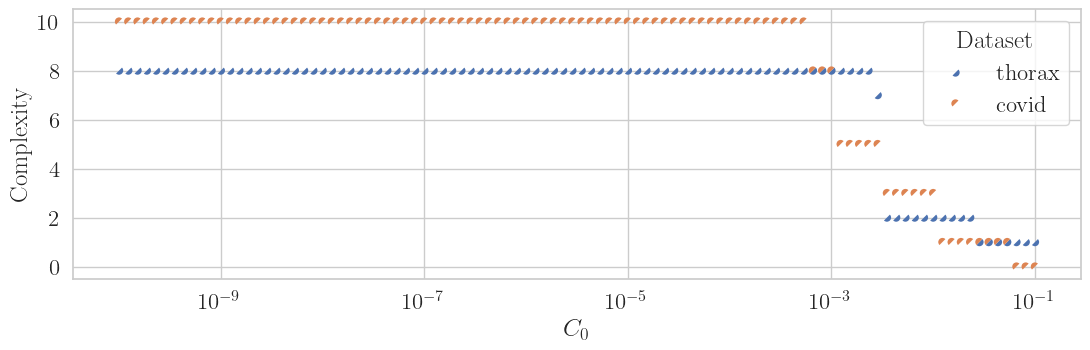

In [42]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(13, 3.5)

dfs = []
for dname in ["thorax", "covid"]:
    df = pd.read_csv(f"{dname} score3.csv").loc[:,["0","1"]]
    df.columns= ("$C_0$", "Complexity")
    df["Dataset"] = dname
    dfs.append(df)
df = pd.concat(dfs)

sns.scatterplot(df, x="$C_0$", y="Complexity", style="Dataset", hue="Dataset",markers=[MarkerStyle("o", "bottom", Affine2D().rotate_deg(45+i*180)) for i in range(len(dfs))],linewidth=0, legend="full")
plt.xscale("log")
axes.yaxis.set_major_locator(MultipleLocator(2))
fig.savefig(f"../../fig/all_csweep_scoreset3.pdf", bbox_inches='tight')